<a href="https://colab.research.google.com/github/mugenzifabrice/LSTM/blob/main/Forecasting_introto_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import of libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)
#import data 
df = pd.read_csv('/content/sample_data/export (1).csv',index_col='date',parse_dates=True,usecols=['date','tavg'])
y = df['tavg'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

FileNotFoundError: ignored

In [ ]:
df.tail()

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

# generate the input and output sequences
n_lookback = 30  # length of input sequences (lookback period)
n_forecast = 40  # length of output sequences (forecast period)

In [ ]:
X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=100))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=150, batch_size=32, verbose=0)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

1/1 [==============================] - 1s 832ms/step


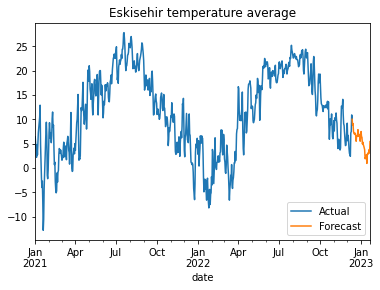

In [ ]:
# organize the results in a data frame
df_past = df[['tavg']].reset_index()
df_past.rename(columns={'index': 'date', 'tavg': 'Actual'}, inplace=True)
df_past['date'] = pd.to_datetime(df_past['date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['date', 'Actual', 'Forecast'])
df_future['date'] = pd.date_range(start=df_past['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('date')

# plot the results
results.plot(title='Eskisehir temperature average')

In [ ]:
df.tail()

,tavg
date,
2022-12-08,2.4
2022-12-09,7.2
2022-12-10,7.5
2022-12-11,10.9
2022-12-12,10.0


In [ ]:
len(df)

711

In [ ]:
df_future

,date,Actual,Forecast
0,2022-12-13,NaN,8.853347
1,2022-12-14,NaN,9.117980
2,2022-12-15,NaN,7.494768
3,2022-12-16,NaN,7.157553
4,2022-12-17,NaN,6.970318
5,2022-12-18,NaN,7.150226
6,2022-12-19,NaN,7.121806
7,2022-12-20,NaN,6.593727
8,2022-12-21,NaN,5.492533
9,2022-12-22,NaN,6.574963
